In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score,StratifiedKFold
from itertools import cycle
import xlsxwriter
from pandas import DataFrame

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('C:\\Users\\Jyotishman Parasar\\DataanalysisChallenge\\milestone bid unit.csv')

In [4]:
data

,Unnamed: 0,BID_UNIT,QUANTITY,UNIT,UNIT_RATE,MILESTONE_RATE,MILESTONE_PERCENTAGE,MILESTONE_NM,MILESTONE_CTGY,MILESTONE_CTGY_GRP,CONSTRUCTION_TYPE,MARKET_ID
0,1,C-100.1,919987,foot,17.07,10.2420,60,2-Construction,4-Cable Placed,4-Cable Placed,New UG Softscape,79
1,2,C-100.1A,1,foot,17.07,14.5095,85,2-Construction,4-Cable Placed,4-Cable Placed,New UG Softscape,79
2,3,C-100.1B,1,foot,17.07,4.2675,25,2-Construction,4-Cable Placed,4-Cable Placed,New UG Softscape,79
3,4,C-100.1X,1,foot,17.07,14.5095,85,2-Construction,4-Cable Placed,4-Cable Placed,New UG Softscape,79
4,5,C-100.2,919987,foot,17.07,6.8280,40,2-Construction,5-Splice and Test,5-Splice and Test,New UG Softscape,79
...,...,...,...,...,...,...,...,...,...,...,...,...
5646,5647,E-355.2,58608,foot,1.35,0.2700,20,1-Engineering,4-Cable Placed,4-Cable Placed,Existing UG,43
5647,5648,E-355.3,58608,foot,1.35,0.1350,10,1-Engineering,6-As Built Complete,6-As Built,Existing UG,43
5648,5649,E-400.1,879120,foot,1.15,0.8050,70,1-Engineering,2-Cable Design,2-Cable Design,Aerial,43
5649,5650,E-400.2,879120,foot,1.15,0.2300,20,1-Engineering,4-Cable Placed,4-Cable Placed,Aerial,43


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5651 entries, 0 to 5650
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5651 non-null   int64  
 1   BID_UNIT              5651 non-null   object 
 2   QUANTITY              5651 non-null   int64  
 3   UNIT                  5651 non-null   object 
 4   UNIT_RATE             5651 non-null   float64
 5   MILESTONE_RATE        5651 non-null   float64
 6   MILESTONE_PERCENTAGE  5651 non-null   int64  
 7   MILESTONE_NM          5651 non-null   object 
 8   MILESTONE_CTGY        5651 non-null   object 
 9   MILESTONE_CTGY_GRP    5651 non-null   object 
 10  CONSTRUCTION_TYPE     5650 non-null   object 
 11  MARKET_ID             5651 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 529.9+ KB


In [6]:
data['CONSTRUCTION_TYPE'] = data['CONSTRUCTION_TYPE'].fillna(value = 'NA')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5651 entries, 0 to 5650
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5651 non-null   int64  
 1   BID_UNIT              5651 non-null   object 
 2   QUANTITY              5651 non-null   int64  
 3   UNIT                  5651 non-null   object 
 4   UNIT_RATE             5651 non-null   float64
 5   MILESTONE_RATE        5651 non-null   float64
 6   MILESTONE_PERCENTAGE  5651 non-null   int64  
 7   MILESTONE_NM          5651 non-null   object 
 8   MILESTONE_CTGY        5651 non-null   object 
 9   MILESTONE_CTGY_GRP    5651 non-null   object 
 10  CONSTRUCTION_TYPE     5651 non-null   object 
 11  MARKET_ID             5651 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 529.9+ KB


In [8]:
print(data['BID_UNIT'].value_counts())

E-200.2       117
E-200.1       116
E-300.1       115
C-100.2A      115
C-100.2B      115
             ... 
E-400.2 CF      1
E-110.2 CF      1
C-305.2         1
C-305.1A        1
C-101.1         1
Name: BID_UNIT, Length: 120, dtype: int64


In [9]:
print(data['UNIT_RATE'].value_counts())

2.25     190
59.00     68
2.95      66
2.97      63
3.00      61
        ... 
0.76       2
2.36       2
0.69       2
27.65      1
0.02       1
Name: UNIT_RATE, Length: 441, dtype: int64


In [10]:
print(data['MILESTONE_PERCENTAGE'].value_counts())

15     1139
85      939
25      627
60      577
40      544
10      506
70      450
20      448
5       174
75      115
95      107
90       10
100       9
30        3
0         2
50        1
Name: MILESTONE_PERCENTAGE, dtype: int64


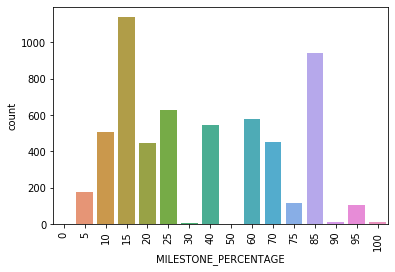

In [20]:
plt.xticks(rotation=90)
sns.countplot(x= 'MILESTONE_PERCENTAGE', data = data)

In [11]:
print(data['MILESTONE_NM'].value_counts())

2-Construction          4053
1-Engineering           1360
4-Project Management     238
Name: MILESTONE_NM, dtype: int64


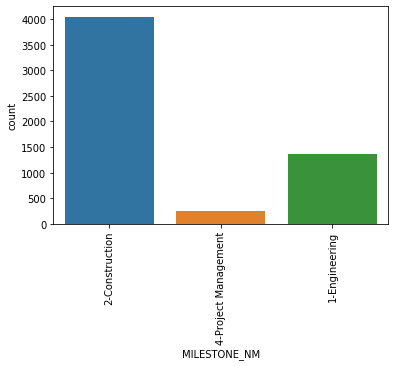

In [19]:
plt.xticks(rotation=90)
sns.countplot(x= 'MILESTONE_NM', data = data)

In [12]:
print(data['MILESTONE_CTGY'].value_counts())

4-Cable Placed                         2616
5-Splice and Test                      1998
2-Cable Design                          573
6-As Built Complete                     453
5-Cable Design-Permits Received-90%       4
5-Cable Design-Permits Received 30%       2
04-Cable Placed                           2
3-As Built-40%                            1
2-Cable Design-CPD 20%                    1
4-Splice and Test                         1
Name: MILESTONE_CTGY, dtype: int64


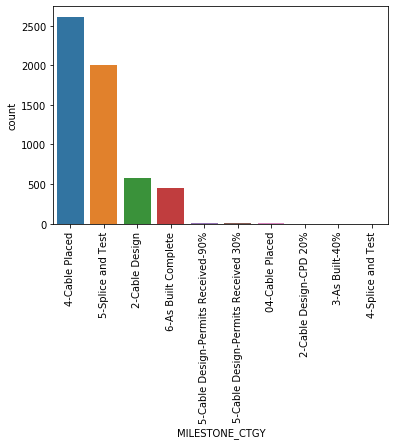

In [18]:
plt.xticks(rotation=90)
sns.countplot(x= 'MILESTONE_CTGY', data = data)

In [13]:
print(data['MILESTONE_CTGY_GRP'].value_counts())

4-Cable Placed       2618
5-Splice and Test    1999
2-Cable Design        580
6-As Built            454
Name: MILESTONE_CTGY_GRP, dtype: int64


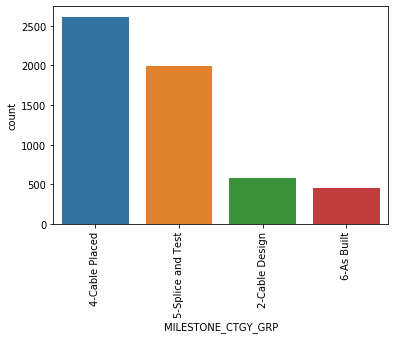

In [14]:
plt.xticks(rotation=90)
sns.countplot(x= 'MILESTONE_CTGY_GRP', data = data)

In [15]:
print(data['CONSTRUCTION_TYPE'].value_counts())

Existing UG               1512
Aerial                    1198
New UG Softscape           923
New UG Hardscape           880
New UG Microtrench         509
New UG Shared              362
Project Management         238
New UG Narrowband 26""      12
New UG Narrowband 16""       8
New UG Cleanfast             8
NA                           1
Name: CONSTRUCTION_TYPE, dtype: int64


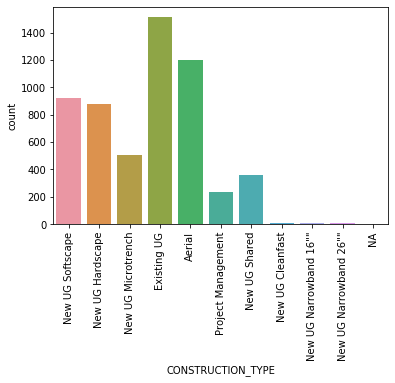

In [17]:
plt.xticks(rotation=90)
sns.countplot(x= 'CONSTRUCTION_TYPE', data = data)

In [16]:
print(data['MARKET_ID'].value_counts())

18    215
7     173
30    163
33    155
2     153
     ... 
70     37
98     33
73     20
86      9
88      8
Name: MARKET_ID, Length: 83, dtype: int64
